In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import data 

In [53]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

In [54]:
df_american = df_american.set_index(['date'])

In [55]:
X = df_american[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [56]:
y = df_american['pax_count'].values

## Train & test split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Normalize the data

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

## Creating the model 

In [61]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                #kernel_initializer=initializers.RandomNormal(stddev=0.01),
               # bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [62]:
opt = keras.optimizers.Adam(learning_rate=0.2)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [63]:
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 59ms/step - loss: 8841781.0000 - val_loss: 8679780.0000
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 8841328.0000 - val_loss: 8677772.0000
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 8836504.0000 - val_loss: 8663995.0000
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 8810794.0000 - val_loss: 8601755.0000
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 8704898.0000 - val_loss: 8383634.0000
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 8368805.0000 - val_loss: 7753843.5000
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 7442493.5000 - val_loss: 6163231.0000
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 5223685.5000 - val_loss: 2561928.5000
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 1527481.3750 - val_loss: 1970678.8750
Epoch 10/1

6/6 [==============================] - 0s 10ms/step - loss: 289998.2500 - val_loss: 344532.5625
Epoch 77/100
6/6 [==============================] - 0s 11ms/step - loss: 293901.8750 - val_loss: 308179.4062
Epoch 78/100
6/6 [==============================] - 0s 10ms/step - loss: 275816.5625 - val_loss: 278294.1875
Epoch 79/100
6/6 [==============================] - 0s 13ms/step - loss: 250868.3438 - val_loss: 295089.7188
Epoch 80/100
6/6 [==============================] - 0s 10ms/step - loss: 264926.8125 - val_loss: 261617.1250
Epoch 81/100
6/6 [==============================] - 0s 10ms/step - loss: 244096.8594 - val_loss: 299841.7500
Epoch 82/100
6/6 [==============================] - 0s 10ms/step - loss: 283870.7812 - val_loss: 300387.2812
Epoch 83/100
6/6 [==============================] - 0s 10ms/step - loss: 256758.9219 - val_loss: 262095.7500
Epoch 84/100
6/6 [==============================] - 0s 10ms/step - loss: 265957.5312 - val_loss: 269746.0312
Epoch 85/100
6/6 [==============

In [64]:
losses = pd.DataFrame(model.history.history)

In [65]:
losses

,loss,val_loss
0,8.841781e+06,8.679780e+06
1,8.841328e+06,8.677772e+06
2,8.836504e+06,8.663995e+06
3,8.810794e+06,8.601755e+06
4,8.704898e+06,8.383634e+06
...,...,...
95,2.242203e+05,2.535879e+05
96,2.317544e+05,2.823337e+05
97,2.401394e+05,2.380527e+05
98,2.164684e+05,2.372113e+05


<AxesSubplot:>

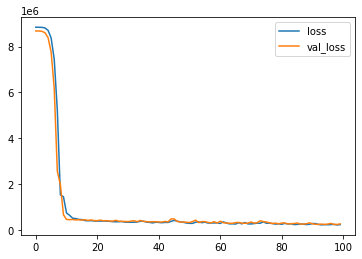

In [66]:
losses.plot()

### Prediction

In [67]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [68]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 8)                 40        
                                                                 
 dense_12 (Dense)            (None, 5)                 45        
                                                                 
 dense_13 (Dense)            (None, 3)                 18        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense_10
  --Kernels (Weights):  [array([[11.461

### Evaluation 

#### MAE and RMSE

In [69]:
MAE_train = (round(mean_absolute_error(y_train, trainPredict),2))
print("Train Score: %.2f MAE" % (MAE_train))

Train Score: 237990.38 MAE


In [70]:
MAE_test = (round(mean_absolute_error(y_test, testPredict),2))
print("Test Score: %.2f MAE" % (MAE_test))

Test Score: 260377.49 MAE


In [71]:
RMSE_train = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (RMSE_train))

Train Score: 316505.28 RMSE


In [72]:
RMSE_test = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (RMSE_test))

Test Score: 327432.36 RMSE


### MAPE 

In [78]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [81]:
round(MAPE(y_test, testPredict),2)

2.97

In [73]:
def plot_american(actual, predictions):
    title = 'Passanger Predictions'
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

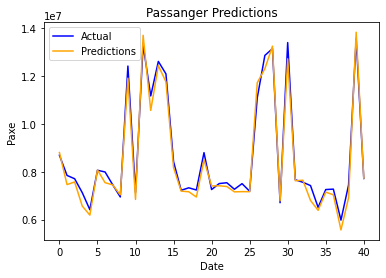

In [74]:
plot_american(y_test, testPredict)

## Export Forecast

In [25]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines


In [26]:
testPredict.tofile('predictions_ffnn.csv')